# Introduction to Artificial Intelligence

In [1]:
!git clone https://github.com/sania8/IntrotoAI.git

fatal: destination path 'IntrotoAI' already exists and is not an empty directory.


First, let's import the required libraries

In [1]:
import pandas as pd #TODO: add balanced classes reporting (multi vs binary) multi remaining binary plotted

Let's read the data from the CSV file

In [2]:
df = pd.read_csv('/content/IntrotoAI/full_df.csv')
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


Plotting the Binary-class classification distribution in the dataset

Converting each image into its vector and flattening it . (2D -> 1D)

In [3]:
from PIL import Image
import numpy as np
import os

image_folder = '/content/IntrotoAI/preprocessed_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Looping the files inside the preprocessed_images folder
for idx, file in enumerate(image_files):
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('RGB')
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    flat_vector = img_array.flatten()


We want to convert each image to a vector so that we are able to process the numerical data for classification. To do so, we will create a new column in the dataframe and store the feature vector of each data point(image) into the corrosponding row.

In [4]:
from PIL import Image
import numpy as np
import os

image_folder = '/content/IntrotoAI/preprocessed_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
df['input_data'] = None
# Looping the files inside the preprocessed_images folder
for file in image_files:
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('RGB')
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    flat_vector = img_array.flatten()
    mask = df['filename'] == file     # if the file name matches then storign that information either true or false into variable "Mask"
    for idx in df[mask].index:
        df.at[idx, 'input_data'] = flat_vector
df


,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename,input_data
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


This dataset has originally 8 classes. Due to the complexity of the classes and their imbalance, we decided to work with binary classification; class = 1 for all normal labels, and class=0 for all others. To do so, we will check the target column of the dataset. If the first value is 1 it means the value is normal, otherwise it is abnormal (class=0).

In [5]:
import ast

clean_targets = []    # initializing the empty list
for value in df['target']:
    if isinstance(value, str):
        value = ast.literal_eval(value)    # converting str to real numbers indicating "[1,0,0]" -> [1,0,0]
    clean_targets.append(value)
df['target'] = clean_targets       # every row in the column target in the dataframe has value for eg. [0,0,1]

# Convert list to single value 1 or 0
new_targets = []
for value in df['target']:   # each value is a list now
    first_element = value[0]   # extracting the first element of every list

    if first_element == 1:
        new_targets.append('1')
    else:
        new_targets.append('0')

df['target'] = new_targets


After the necessarry transformations, we are going to print the finalized dataframe with the binary classes and the new column ("input_data") for the vectors of our images.

In [6]:
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename,input_data
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,0_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,1_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,2_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,5_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4686_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4688_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4689_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4690_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Now we want to print the shape of the vectors to check how many features each image has

In [7]:
print(flat_vector.shape)

(786432,)


After realizing that each image has approximately 780.000 features we need to reduce the number of features to be able to run the analyses. One solution to that problem is downsizing the dimensions of the images to 100X100.

In [8]:
import os
from PIL import Image

input_folder = "/content/IntrotoAI/preprocessed_images"
output_folder = "resized_images"

for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg")):
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path)
        img_resized = img.resize((100, 100))
        save_path = os.path.join(output_folder, filename)
        img_resized.save(save_path)
        print(f"Resized and saved: {filename}")

print("All images resized to 100×100 successfully!")

Streaming output truncated to the last 5000 lines.
Resized and saved: 2445_right.jpg
Resized and saved: 3244_left.jpg
Resized and saved: 951_right.jpg
Resized and saved: 469_left.jpg
Resized and saved: 2951_left.jpg
Resized and saved: 28_right.jpg
Resized and saved: 3261_right.jpg
Resized and saved: 4207_left.jpg
Resized and saved: 303_left.jpg
Resized and saved: 3149_left.jpg
Resized and saved: 151_left.jpg
Resized and saved: 2601_left.jpg
Resized and saved: 3289_left.jpg
Resized and saved: 588_left.jpg
Resized and saved: 1106_left.jpg
Resized and saved: 4011_left.jpg
Resized and saved: 2935_right.jpg
Resized and saved: 2573_right.jpg
Resized and saved: 4491_left.jpg
Resized and saved: 2623_left.jpg
Resized and saved: 3941_right.jpg
Resized and saved: 64_right.jpg
Resized and saved: 603_left.jpg
Resized and saved: 2138_right.jpg
Resized and saved: 2448_left.jpg
Resized and saved: 2488_right.jpg
Resized and saved: 946_left.jpg
Resized and saved: 2926_right.jpg
Resized and saved: 2810_r

Now we need to see how much our features have been reduced by downsizing the images to 100X100. To do so, we will just check the first image of the resized_images folder, create its vector, flatten it and check its shape.

In [9]:
from PIL import Image
import numpy as np
import os
path="resized_images/0_left.jpg"
img = Image.open(path).convert('RGB')
img_array = np.array(img)
# flattening the vector to shape 1D from 2D
flat_vector1 = img_array.flatten()
flat_vector1.shape

(30000,)

After downsizing the images, we managed to reduce the no. of features from 780.000 to 30.000 which is more easy to handle. Now we need to create the dataset with the vectors of all resized images. We will save the vectors of resized images to the same df, in a new column called input_data_resized

In [ ]:
from PIL import Image
import numpy as np
import os

image_folder = 'resized_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
df['input_data_resized'] = None
# Looping the files inside the preprocessed_images folder
for file in image_files:
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('RGB')
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    flat_vector = img_array.flatten()
    mask = df['filename'] == file     # if the file name matches then storign that information either true or false into variable "Mask"
    for idx in df[mask].index:
        df.at[idx, 'input_data_resized'] = flat_vector
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,A,H,M,O,filepath,labels,target,filename,input_data,input_data_resized
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,0_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,1_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,2_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 0, 4, 4, 0, 4, 3, 0, 2, 3, 0, 2, 1, 0, 0, ..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,5_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4686_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4688_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4689_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4690_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, ..."


## Working with Grayscale Images

Apart from our colored data, we also want to run the same analyses for grayscale images in order to be able to compare the results of coloured and grayscale pictures. To do so, we will convert all coloured preprocessed (original size) images to grayscale format. We need to create a folder called "gray_images" that will store all grayscale images.

In [11]:
import os
import cv2

input_folder = '/content/IntrotoAI/preprocessed_images'
output_folder = 'gray_images'
for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg")):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        save_path = os.path.join(output_folder, filename)
        cv2.imwrite(save_path, gray_img)

print(f"All images have been converted to grayscale and saved to '{output_folder}'")

All images have been converted to grayscale and saved to 'gray_images'


After creating the grayscale images, we want to check the no. of features. We will just check the shape of the first image of grayscale images folder.

In [12]:
from PIL import Image
import numpy as np
import os
path="gray_images/0_left.jpg"
img = Image.open(path).convert('L')
img_array = np.array(img)
# flattening the vector to shape 1D from 2D
flat_vector2 = img_array.flatten()
flat_vector2.shape

(262144,)

After converting to grayscale with their original dimensions, the images have 260.000 features. We will also downsize the grayscale images to further reduce the no. of features. We will create a new folder called gray_resized_images and follow the same logic as in the coloured images.

In [ ]:
import os
from PIL import Image

input_folder = "gray_images"
output_folder = "gray_resized_images"

for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg")):
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path)
        img_resized = img.resize((100, 100))
        save_path = os.path.join(output_folder, filename)
        img_resized.save(save_path)
        print(f"Resized and saved: {filename}")

print("All grayscale images resized to 100×100 successfully!")

Streaming output truncated to the last 5000 lines.
Resized and saved: 2445_right.jpg
Resized and saved: 3244_left.jpg
Resized and saved: 951_right.jpg
Resized and saved: 469_left.jpg
Resized and saved: 2951_left.jpg
Resized and saved: 28_right.jpg
Resized and saved: 3261_right.jpg
Resized and saved: 4207_left.jpg
Resized and saved: 303_left.jpg
Resized and saved: 3149_left.jpg
Resized and saved: 151_left.jpg
Resized and saved: 2601_left.jpg
Resized and saved: 3289_left.jpg
Resized and saved: 588_left.jpg
Resized and saved: 1106_left.jpg
Resized and saved: 4011_left.jpg
Resized and saved: 2935_right.jpg
Resized and saved: 2573_right.jpg
Resized and saved: 4491_left.jpg
Resized and saved: 2623_left.jpg
Resized and saved: 3941_right.jpg
Resized and saved: 64_right.jpg
Resized and saved: 603_left.jpg
Resized and saved: 2138_right.jpg
Resized and saved: 2448_left.jpg
Resized and saved: 2488_right.jpg
Resized and saved: 946_left.jpg
Resized and saved: 2926_right.jpg
Resized and saved: 2810_r

Now, we need to check how much the features were reduced by downsizing the grayscale images

In [14]:
from PIL import Image
import numpy as np
import os
path="gray_resized_images/0_left.jpg"
img = Image.open(path).convert('L')
img_array = np.array(img)
# flattening the vector to shape 1D from 2D
flat_vector3 = img_array.flatten()
flat_vector3.shape

(10000,)

We managed to reduce the number of grayscale images from 260.000 to just 10.000 features.

Now we want to add to our dataframe the vectors for both original and resized grayscale images. We will use the same logic as in coloured images.

In [ ]:
image_folder = 'gray_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
df['input_gray'] = None
# Looping the files inside the preprocessed_images folder
for file in image_files:
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('L')
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    flat_vector = img_array.flatten()
    mask = df['filename'] == file     # if the file name matches then storign that information either true or false into variable "Mask"
    for idx in df[mask].index:
        df.at[idx, 'input_gray'] = flat_vector
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,H,M,O,filepath,labels,target,filename,input_data,input_data_resized,input_gray
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,0_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,1_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,2_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,...,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 0, 4, 4, 0, 4, 3, 0, 2, 3, 0, 2, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,5_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4686_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4688_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4689_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4690_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
image_folder = 'gray_resized_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
df['input_gray_resized'] = None
# Looping the files inside the preprocessed_images folder
for file in image_files:
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('L')
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    flat_vector = img_array.flatten()
    mask = df['filename'] == file     # if the file name matches then storign that information either true or false into variable "Mask"
    for idx in df[mask].index:
        df.at[idx, 'input_gray_resized'] = flat_vector
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,M,O,filepath,labels,target,filename,input_data,input_data_resized,input_gray,input_gray_resized
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,0_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,1_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,2_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,...,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 0, 4, 4, 0, 4, 3, 0, 2, 3, 0, 2, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,5_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4686_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4688_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4689_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4690_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## PCA

We have managed to reduce the no. of features by downsizing the images (30.000 for coloured and 10.000 for grayscale). We will also apply PCA on both grayscale and coloured to further reduce their features.

In [17]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

Applying PCA on coloured resized images 100x100

In [ ]:

b = df["input_data_resized"].values
X1 = np.stack(b)
Y1 = df["target"].values
X1.shape, Y1.shape


((6392, 30000), (6392,))

In [19]:
print(f'Total samples: {X1.shape[0]}, Features per sample: {X1.shape[1]}')

Total samples: 6392, Features per sample: 30000


After having created our X1 and Y1 values, we also need to apply standardization (mean=0, std=1) to our X1 data.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

In [ ]:
pca = PCA(n_components=36) #TODO: variance or no. of components
X_pca = pca.fit_transform(X_scaled)

print(f'Reduced features shape: {X_pca.shape}')

Reduced features shape: (6392, 36)


In [ ]:
print("Cumulative:", np.cumsum(pca.explained_variance_ratio_))

Cumulative: [0.41788384 0.55238598 0.63736319 0.71075523 0.76690689 0.81069075
 0.84279793 0.85622769 0.86884856 0.88028147 0.88917591 0.89521602
 0.90040527 0.90523767 0.9096385  0.91394111 0.91777147 0.92111995
 0.92417696 0.92705342 0.9295676  0.93188564 0.93395737 0.93580116
 0.93757009 0.93913813 0.94063459 0.94200568 0.94333372 0.94462217
 0.94573514 0.94680782 0.94784818 0.94885526 0.94982736 0.95072018]


In [ ]:
X_pca.shape, Y1.shape

((6392, 36), (6392,))

We have reduced the no. of components to just 600 features by keeping 99.1% of variance.

Applying PCA on grayscale images 100x100

In [24]:
b = df["input_gray_resized"].values
X2 = np.stack(b)
Y2 = df["target"].values
X2.shape, Y2.shape

((6392, 10000), (6392,))

Applying standardization for grayscale images too

In [25]:
scaler = StandardScaler()
X_scaled_2 = scaler.fit_transform(X2)

In [26]:
pca2 = PCA(n_components=22) #TODO: variance or no. of components
X_pca2 = pca2.fit_transform(X_scaled_2)

print(f'Reduced features shape: {X_pca2.shape}')

Reduced features shape: (6392, 22)


In [27]:
print("Cumulative for grayscale:", np.cumsum(pca2.explained_variance_ratio_))

Cumulative for grayscale: [0.48995361 0.62379624 0.71616807 0.78040508 0.83228584 0.86715086
 0.88210379 0.89506089 0.90608663 0.91374089 0.91912534 0.92445321
 0.92932418 0.93276929 0.93596766 0.93909015 0.94167248 0.94404899
 0.94622845 0.94816958 0.94990196 0.95158755]


In [28]:
X_pca2.shape, Y2.shape

((6392, 22), (6392,))

We have reduced the no. of features for grayscale images to just 600 while keeping 99.4% of the variance.

## Train_Test Splitting

Let's split our dataset into training and testing for coloured images

In [29]:
#splitting the dataset into train and testing which is 80% trainign and 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(
    X_pca, Y1, test_size=0.20, random_state=42, shuffle=True, stratify=Y1
)

# Now splitting the dataset into test and valdiation where 20% breaks down to 10% test and 10% validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True, stratify=y_temp
)

print(f"Training data: {X_train.shape}, Validation data: {X_val.shape}, Test data: {X_test.shape}")

Training data: (5113, 36), Validation data: (639, 36), Test data: (640, 36)


Applying PCA:
for each sample in the dataset we have 100,000 features using PCA we are reducing the number of features from 100,000 t0 600 features per sample.
As per the research the thumb rule is :
number of samples >= 10 times the number of features to have after PCA
so earlier there were 6,000+ samples
so :
6000 >= 10 x k(number of features to be there for each sample)
6000/10 >= k
600>=k
so k<=600 (means as long as number of features for each sample are 600, it would be ideal for the data to be trained on SVM)
We now have our input data into the variable called as "X_pca" and we have our labels into "labels" folder

Flow of number of features duirng pre-processing
1. coloured images non-resized : 700,000
2. coloured images re-sized : 30,000
3. greyscaled images non re-sized : 261,000
4. grayscaled imaged re-sizedL 10,000
5, Applying PCA on grayscale images: 600
The shape of the datase is (6392,600) where number of samples/images = 6392 and number of features per sample=600

Stratify- Ensures that the proportion of a target variable's classes is the same in training, testing and testing sets as it was in the original
The dataset has been split into the following manner:
1. Firstly the dataset is split into train and test which 80% for training and 20% for testing maintaining the distribtion of the class in each folder using Stratify.
2. Secondaly the test data is further split into 10% tetsing and 10% validation dataset again maintaing the distribution of the classes in the dataset .
Overall, the entire dataset is split in the ratio 80:10:10 (80% training, 10% testing and 10% validation)

## Support Vector Machines

The first model that we are going to use is SVM. Let's run a simple SVM for coloured images.

Below is the code for training the SVM on the model where basically the training data has been put on the SVM and then model if fit (train) on the trainin data. Later on the trained model is used to predict the labels for Training data, Testing ad Validation dataset.
Then plottign the confusion matrix on the testing dataset.

## Training SVM on coloured images. We are implementing and tuning hyperparameters using Grid Search. It will form multiple combinations of "kernel", "gamma" and C_values and find the best set of hyperparameters.
Following is the list of hyperparameters that can be used to fine-tune SVM model.
1. C_value: It is a regularization hyperparameter. If the value of C is low it will allow some misclassification and hence will lead to less overfitting. If the valur of C is kept very high it will tries to correctly classify all training points hence resulting in overfitting
2. Kernel: It is a type of decision boundary. It is generally of two types Linear, poly, RBF. If  the dataset is linearly separable then use Linear otherwise use RBF
3. Gamma: it influences the classification of training point. If its kept too high Each point might have small influence hence overfit.Low gamma: Each point has a large influence → smoother boundary → underfitting.
4. Probability:
5. Shrinking: It is a hyperparameter which speedens up on training when the datasets are very large. Does not affect accuracy much.
6. Class_weight: Specially for datasets that have imabalance. It automatically assigns the weights depedending on the frequency of the class.
7. Verbose: If the information needs to be printed during trainign for larger datasets
8. Probability: What it does: Allows model.predict_proba() for soft classification.
Reason for chosing these hyperparameters:
We chose a linear SVM because linear kernels are fast for high-dimensional data. C is tuned to balance margin size and training errors, gamma (for RBF) controls point influence, and class_weight='balanced' handles class imbalance. Random state and max_iter ensure reproducibility and full convergence. In order to have full picture of the dataset in terms of separability we are using both "Linear" and "RBF" kernels during the training.

**Training SVM on coloured Images**

Now we will train SVM
For Training SVM on coloured images we will be implementing with the following parameters. For this instead of doing cross-validation, we simply implemented a loop so that trainings can be reduced in case of cross-validaiton the trainings are higher hence, computationally very expensive:
1. Kernels =['linear', 'rbf'] due to limited compute
2. gammas = ['scale']
3. C(Reagularization parameter) = [0.1, 1, 5]

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
C_values = [0.1, 1, 5]
kernels  = ['linear', 'rbf']
gammas   = ['scale']
best_acc = 0
best_params = None
best_model = None

from sklearn.svm import SVC, LinearSVC

for C in C_values:
    for kernel in kernels:
        for gamma in gammas:
            print(f"Training with: C={C}, kernel={kernel}, gamma={gamma}")
            if kernel == 'linear':
                model = LinearSVC(C=C, max_iter=10000, random_state=42)
            else:
                model = SVC(C=C, kernel=kernel, gamma=gamma, random_state=42)
            model.fit(X_train, y_train)

            val_pred = model.predict(X_val)
            val_acc = accuracy_score(y_val, val_pred)
            print(f" → Validation Accuracy: {val_acc:.4f}\n")
            if val_acc > best_acc:
                best_acc = val_acc
                best_params = (C, kernel, gamma)
                best_model = model


print("Best parameters:", best_params)
print("Best validation accuracy:", best_acc)
y_train_pred = best_model.predict(X_train)
y_val_pred   = best_model.predict(X_val)
y_test_pred  = best_model.predict(X_test)

print(f"Training Accuracy:   {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Test Accuracy:       {accuracy_score(y_test, y_test_pred):.4f}")


Training with: C=0.1, kernel=linear, gamma=scale
 → Validation Accuracy: 0.5790

Training with: C=0.1, kernel=rbf, gamma=scale
 → Validation Accuracy: 0.5290

Training with: C=1, kernel=linear, gamma=scale
 → Validation Accuracy: 0.5790

Training with: C=1, kernel=rbf, gamma=scale
 → Validation Accuracy: 0.5446

Training with: C=5, kernel=linear, gamma=scale
 → Validation Accuracy: 0.5790

Training with: C=5, kernel=rbf, gamma=scale
 → Validation Accuracy: 0.5446

Best parameters: (0.1, 'linear', 'scale')
Best validation accuracy: 0.5790297339593115
Training Accuracy:   0.5951
Validation Accuracy: 0.5790
Test Accuracy:       0.5672


1. Plotting the confusion matrix for the best set of parameters and Validation accuracy
2. Second plot shows for what combinations what was the Validation accuracy obtained

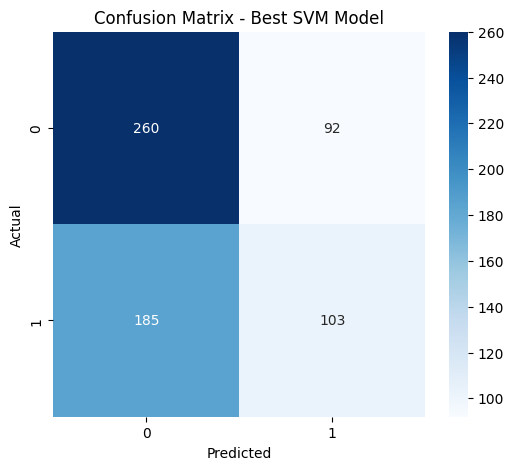

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- Predict on test set ---
y_test_pred = best_model.predict(X_test)

# --- Compute confusion matrix ---
cm = confusion_matrix(y_test, y_test_pred)
labels = sorted(list(set(y_test)))  # unique class labels

# --- Plot confusion matrix ---
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best SVM Model")
plt.show()


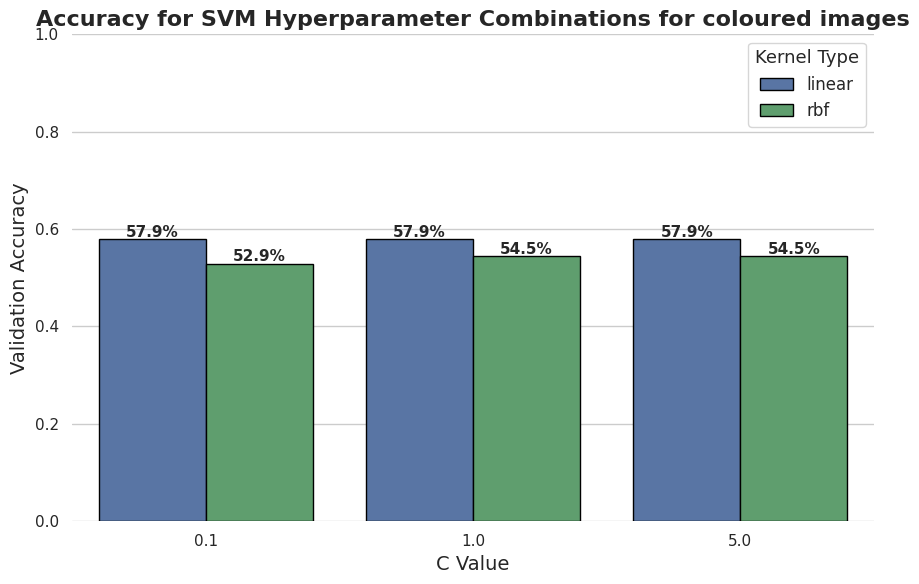

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = [
    {"C": 0.1, "kernel": "linear", "val_accuracy": 0.5790},
    {"C": 0.1, "kernel": "rbf",    "val_accuracy": 0.5290},
    {"C": 1,   "kernel": "linear", "val_accuracy": 0.5790},
    {"C": 1,   "kernel": "rbf",    "val_accuracy": 0.5446},
    {"C": 5,   "kernel": "linear", "val_accuracy": 0.5790},
    {"C": 5,   "kernel": "rbf",    "val_accuracy": 0.5446},
]

df_results = pd.DataFrame(results)
df_results['C'] = df_results['C'].astype(str)

plt.figure(figsize=(9,6))
ax = sns.barplot(
    x="C", y="val_accuracy", hue="kernel",
    data=df_results, palette=["#4C72B0", "#55A868"], edgecolor='black'
)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width()/2.,
            height + 0.005,
            f'{height*100:.1f}%',
            ha="center", fontsize=11, fontweight='bold'
        )

plt.title("Accuracy for SVM Hyperparameter Combinations for coloured images", fontsize=16, fontweight='bold')
plt.xlabel("C Value", fontsize=14)
plt.ylabel("Validation Accuracy", fontsize=14)
plt.ylim(0, 1)
plt.legend(title="Kernel Type", fontsize=12, title_fontsize=13)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


Let's split our dataset into training and testing for greyscale images

In [37]:
#splitting the dataset into train and testing which is 80% training and 20% testing
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(
    X_pca2, Y2, test_size=0.20, random_state=42, shuffle=True, stratify=Y1
)

# Now splitting the dataset into test and validation where 20% breaks down to 10% test and 10% validation
X_val2, X_test2, y_val2, y_test2 = train_test_split(
    X_temp2, y_temp2, test_size=0.5, random_state=42, shuffle=True, stratify=y_temp2
)

print(f"Training data: {X_train2.shape}, Validation data: {X_val2.shape}, Test data: {X_test2.shape}")

Training data: (5113, 22), Validation data: (639, 22), Test data: (640, 22)


**Trainign SVM on Gray Images**

Now we will train SVM
For Training SVM on Gray images we will be implementing with the following parameters. For this instead of doing cross-validation, we simply implemented a loop so that trainings can be reduced in case of cross-validaiton the trainings are higher hence, computationally very expensive:
1. Kernels =['linear', 'rbf'] due to limited compute
2. gammas = ['scale']
3. C(Reagularization parameter) = [0.1, 1, 5]

In [38]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

C_values = [0.1, 1, 5]
kernels  = ['linear', 'rbf']
gammas   = ['scale']

best_acc = 0
best_params = None
best_model = None

for C in C_values:
    for kernel in kernels:
        for gamma in gammas:
            print(f"Training with: C={C}, kernel={kernel}, gamma={gamma}")
            if kernel == 'linear':
                model = LinearSVC(C=C, max_iter=10000, random_state=42)
            else:
                model = SVC(C=C, kernel=kernel, gamma=gamma, random_state=42)

            # Train on the updated training set
            model.fit(X_train2, y_train2)

            # Validate on the updated validation set
            val_pred = model.predict(X_val2)
            val_acc = accuracy_score(y_val2, val_pred)
            print(f" → Validation Accuracy: {val_acc:.4f}\n")

            if val_acc > best_acc:
                best_acc = val_acc
                best_params = (C, kernel, gamma)
                best_model = model

# Print best hyperparameters
print("Best parameters:", best_params)
print("Best validation accuracy:", best_acc)

# Predictions using best model
y_train_pred = best_model.predict(X_train2)
y_val_pred   = best_model.predict(X_val2)
y_test_pred  = best_model.predict(X_test2)

print(f"Training Accuracy:   {accuracy_score(y_train2, y_train_pred):.4f}")
print(f"Validation Accuracy: {accuracy_score(y_val2, y_val_pred):.4f}")
print(f"Test Accuracy:       {accuracy_score(y_test2, y_test_pred):.4f}")


Training with: C=0.1, kernel=linear, gamma=scale
 → Validation Accuracy: 0.5540

Training with: C=0.1, kernel=rbf, gamma=scale
 → Validation Accuracy: 0.5274

Training with: C=1, kernel=linear, gamma=scale
 → Validation Accuracy: 0.5540

Training with: C=1, kernel=rbf, gamma=scale
 → Validation Accuracy: 0.5462

Training with: C=5, kernel=linear, gamma=scale
 → Validation Accuracy: 0.5540

Training with: C=5, kernel=rbf, gamma=scale
 → Validation Accuracy: 0.5383

Best parameters: (0.1, 'linear', 'scale')
Best validation accuracy: 0.5539906103286385
Training Accuracy:   0.5916
Validation Accuracy: 0.5540
Test Accuracy:       0.5672


1. Plotting the confusion matrix for the best set of parameters and Validation accuracy
2. Second plot shows for what combinations what was the Validation accuracy obtained

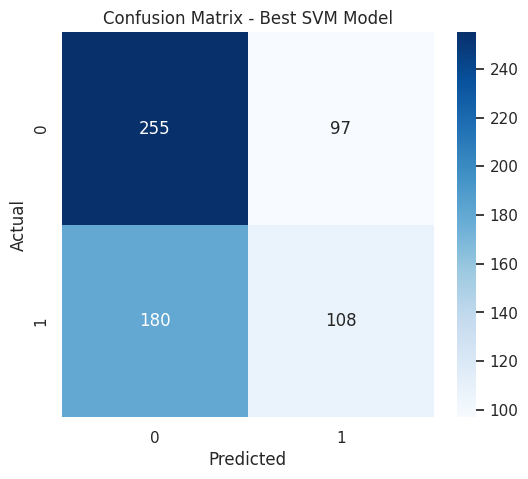

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- Predict on test set ---
y_test_pred = best_model.predict(X_test2)


cm = confusion_matrix(y_test2, y_test_pred)
labels = sorted(list(set(y_test2)))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best SVM Model")
plt.show()


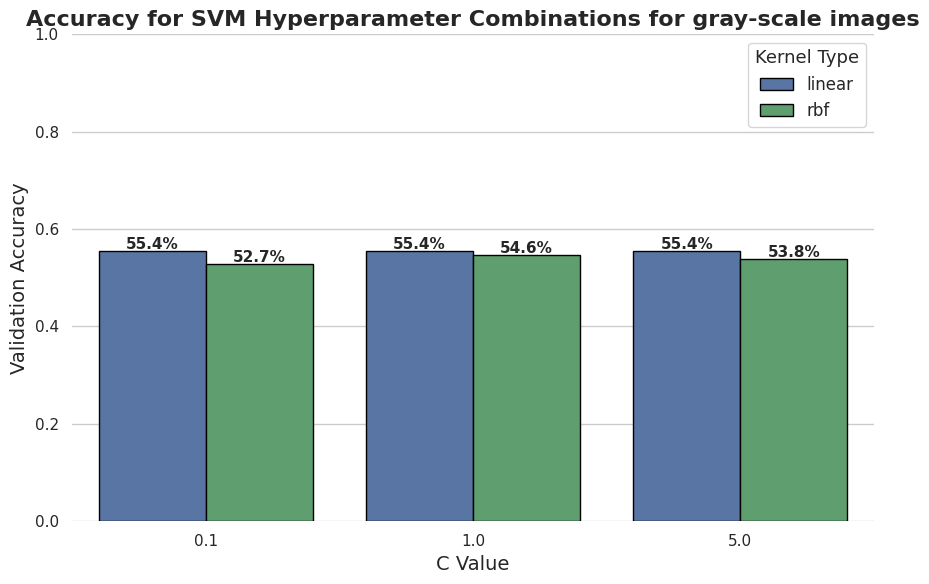

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = [
    {"C": 0.1, "kernel": "linear", "val_accuracy": 0.5540},
    {"C": 0.1, "kernel": "rbf",    "val_accuracy": 0.5274},
    {"C": 1,   "kernel": "linear", "val_accuracy": 0.5540},
    {"C": 1,   "kernel": "rbf",    "val_accuracy": 0.5462},
    {"C": 5,   "kernel": "linear", "val_accuracy": 0.5540},
    {"C": 5,   "kernel": "rbf",    "val_accuracy": 0.5383},
]

df_results = pd.DataFrame(results)
df_results['C'] = df_results['C'].astype(str)
plt.figure(figsize=(9,6))
ax = sns.barplot(
    x="C", y="val_accuracy", hue="kernel",
    data=df_results, palette=["#4C72B0", "#55A868"], edgecolor='black'
)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width()/2.,
            height + 0.005,
            f'{height*100:.1f}%',
            ha="center", fontsize=11, fontweight='bold'
        )
plt.title("Accuracy for SVM Hyperparameter Combinations for gray-scale images", fontsize=16, fontweight='bold')
plt.xlabel("C Value", fontsize=14)
plt.ylabel("Validation Accuracy", fontsize=14)
plt.ylim(0, 1)
plt.legend(title="Kernel Type", fontsize=12, title_fontsize=13)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


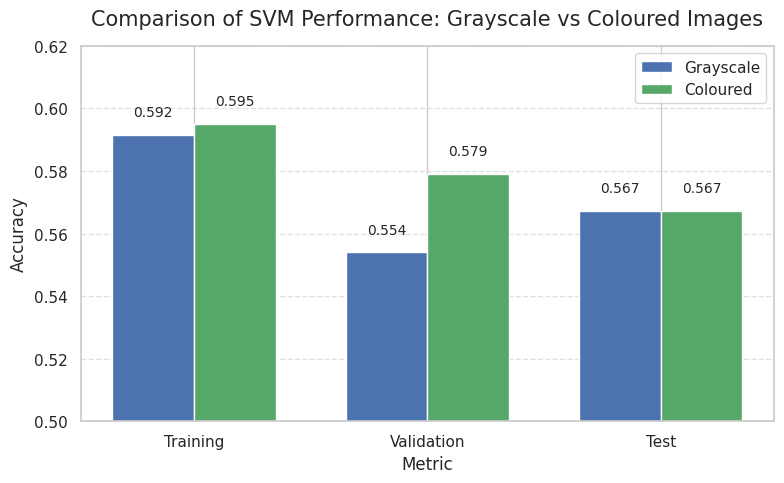

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ["Training", "Validation", "Test"]

grayscale_acc = [0.5916, 0.5540, 0.5672]
coloured_acc  = [0.5951, 0.5790, 0.5672]

x = np.arange(len(metrics))   # positions for groups
width = 0.35                  # width of each bar

plt.figure(figsize=(8,5))

# Bars
bars1 = plt.bar(x - width/2, grayscale_acc, width, label='Grayscale', color="#4C72B0")
bars2 = plt.bar(x + width/2, coloured_acc,  width, label='Coloured', color="#55A868")

# Add accuracy labels on each bar
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.005,
        f"{height:.3f}",
        ha="center", va="bottom", fontsize=10
    )

# Labels and title
plt.title("Comparison of SVM Performance: Grayscale vs Coloured Images", fontsize=15, pad=15)
plt.xlabel("Metric", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(x, metrics, fontsize=11)
plt.ylim(0.50, 0.62)

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Legend
plt.legend()

plt.tight_layout()
plt.show()


# Mulit-class classification using SVM

In [3]:
import pandas as pd
df_multi = pd.read_csv('full_df.csv')

In [4]:
df_multi

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [5]:
import ast

# Convert string targets to lists (if needed)
df_multi['target'] = df_multi['target'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

num_classes = len(df_multi['target'].iloc[0])   # e.g., 8 classes
class_counts = [0] * num_classes

# Count samples per class
for target in df_multi['target']:
    for i in range(num_classes):
        if target[i] == 1:
            class_counts[i] += 1

# Print results
for i, count in enumerate(class_counts):
    print(f"Number of samples in class {i}: {count}")


Number of samples in class 0: 2873
Number of samples in class 1: 1608
Number of samples in class 2: 284
Number of samples in class 3: 293
Number of samples in class 4: 266
Number of samples in class 5: 128
Number of samples in class 6: 232
Number of samples in class 7: 708


Flattening all images and converting into vectors and saving the dataframe

In [6]:
from PIL import Image
import numpy as np
import os

image_folder = 'preprocessed_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
df_multi['input_data'] = None
# Looping the files inside the preprocessed_images folder
for file in image_files:
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('RGB')
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    flat_vector = img_array.flatten()
    mask = df_multi['filename'] == file     # if the file name matches then storign that information either true or false into variable "Mask"
    for idx in df_multi[mask].index:
        df_multi.at[idx, 'input_data'] = flat_vector
df_multi


,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename,input_data
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Resizing or downsizing images to size 100x100 for coloured images adding one more column in the dataset where resized images are flattened and converted to vectors

In [7]:
from PIL import Image
import numpy as np
import os
import os
from PIL import Image

input_folder = "preprocessed_images"
output_folder = "resized_images"

for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg")):
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path)
        img_resized = img.resize((100, 100))
        save_path = os.path.join(output_folder, filename)
        img_resized.save(save_path)
        print(f"Resized and saved: {filename}")

print("All images resized to 100×100 successfully!")
image_folder = 'resized_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
df_multi['input_data_resized'] = None
# Looping the files inside the preprocessed_images folder
for file in image_files:
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('RGB')
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    flat_vector = img_array.flatten()
    mask = df_multi['filename'] == file     # if the file name matches then storign that information either true or false into variable "Mask"
    for idx in df_multi[mask].index:
        df_multi.at[idx, 'input_data_resized'] = flat_vector
df_multi

Resized and saved: 0_left.jpg
Resized and saved: 0_right.jpg
Resized and saved: 1005_right.jpg
Resized and saved: 1006_left.jpg
Resized and saved: 1006_right.jpg
Resized and saved: 1008_left.jpg
Resized and saved: 1008_right.jpg
Resized and saved: 100_left.jpg
Resized and saved: 100_right.jpg
Resized and saved: 1010_left.jpg
Resized and saved: 1010_right.jpg
Resized and saved: 1011_left.jpg
Resized and saved: 1011_right.jpg
Resized and saved: 1012_left.jpg
Resized and saved: 1012_right.jpg
Resized and saved: 1013_left.jpg
Resized and saved: 1013_right.jpg
Resized and saved: 1014_right.jpg
Resized and saved: 1015_left.jpg
Resized and saved: 1015_right.jpg
Resized and saved: 1016_left.jpg
Resized and saved: 1016_right.jpg
Resized and saved: 1018_right.jpg
Resized and saved: 1019_left.jpg
Resized and saved: 1019_right.jpg
Resized and saved: 101_left.jpg
Resized and saved: 101_right.jpg
Resized and saved: 1020_left.jpg
Resized and saved: 1021_left.jpg
Resized and saved: 1021_right.jpg
Resi

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,A,H,M,O,filepath,labels,target,filename,input_data,input_data_resized
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 4, 0, 0, 4, 0, 0, 2, 0, 0, 2, 0, 1, 0, ..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 4, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 3, 2, 0, 3, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, ..."


Since above is the number of data points for each class there is a huge imbalance so Ill be selecting 1000 samples from each class so that data can be balanced so for class  and class 1 we will downsample images so that from 2873 and 1608 only 1000 samples are considered
for others data will be upsampled so that balance can be maintained
class 0 and 1 : downsampled
class 2 to 7 : upsampled

In [8]:
import ast

df_multi['labels'] = df_multi['labels'].apply(
    lambda x: ast.literal_eval(x)[0] if isinstance(x, str) else x[0]
)


In [9]:
TARGET_SAMPLES = 1000
resampled_parts = []
for label, group in df_multi.groupby('labels'):
    count = len(group)
    if label in ['N', 'D']:
        sampled_group = group.sample(
            n=TARGET_SAMPLES,
            replace=False,
            random_state=42
        )
    elif count < TARGET_SAMPLES:
        sampled_group = group.sample(
            n=TARGET_SAMPLES,
            replace=True,
            random_state=42
        )
    else:
        sampled_group = group
    resampled_parts.append(sampled_group)
df_multi = pd.concat(resampled_parts).reset_index(drop=True)


In [10]:
df_multi['labels'].value_counts()

labels
A    1000
C    1000
D    1000
G    1000
H    1000
M    1000
N    1000
O    1000
Name: count, dtype: int64

Applying PCA on coloured images for multi class classification

In [11]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
b = df_multi["input_data_resized"].values
X1 = np.stack(b)
b1 = df_multi["target"].values
Y1 = np.stack(b1)
X1.shape, Y1.shape


((8000, 30000), (8000, 8))

In [16]:
print(f'Total samples: {X1.shape[0]}, Features per sample: {X1.shape[1]}')


Total samples: 8000, Features per sample: 30000


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)
pca = PCA(n_components=36) #TODO: variance or no. of components
X_pca = pca.fit_transform(X_scaled)



In [ ]:
print(f'Reduced features shape: {X_pca.shape}')
print("Cumulative:", np.cumsum(pca.explained_variance_ratio_))
X_pca.shape, Y1.shape

Reduced features shape: (8000, 36)
Cumulative: [0.4155454  0.55680583 0.63568898 0.7037482  0.7555772  0.80075764
 0.83556905 0.84841006 0.86042507 0.87181937 0.88150178 0.88786971
 0.89382374 0.8985152  0.90294418 0.90730815 0.91144459 0.91530706
 0.91850527 0.92139194 0.92400048 0.92638407 0.92843688 0.93037498
 0.9322454  0.93397095 0.93553177 0.93703611 0.93850583 0.93986789
 0.94120115 0.942447   0.9436521  0.94477493 0.94585847 0.94688612]


((8000, 36), (8000, 8))

Splitting the dataset into train, test and validation in the ratio 80:10:10

In [19]:
#splitting the dataset into train and testing which is 80% trainign and 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(
    X_pca, Y1, test_size=0.20, random_state=42, shuffle=True, stratify=Y1
)

# Now splitting the dataset into test and valdiation where 20% breaks down to 10% test and 10% validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True, stratify=y_temp
)

print(f"Training data: {X_train.shape}, Training data labels: {y_train.shape}")
print(f"Testing data: {X_test.shape}, Training data labels: {y_test.shape}")
print(f"Validation data: {X_val.shape}, Training data labels: {y_val.shape}")

Training data: (6400, 36), Training data labels: (6400, 8)
Testing data: (800, 36), Training data labels: (800, 8)
Validation data: (800, 36), Training data labels: (800, 8)


In [20]:
# Features
X = np.stack(df_multi["input_data_resized"].values)

# Labels (one-hot → class index)
Y = np.argmax(
    np.stack(df_multi["target"].values),
    axis=1
)

print(X.shape, Y.shape)
print("Classes:", np.unique(Y))


(8000, 30000) (8000,)
Classes: [0 1 2 3 4 5 6 7]


Training SVM on this data and printing metrics

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X_pca, Y1,
    test_size=0.20,
    random_state=42,
    stratify=Y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)


In [26]:
print(X_train.shape, y_train.shape)

(6400, 36) (6400,)


In [23]:
# Convert one-hot target → class index
Y1 = np.argmax(
    np.stack(df_multi["target"].values),
    axis=1
)

print(Y1.shape)          # (8000,)
print(np.unique(Y1))     # [0 1 2 3 4 5 6 7]


(8000,)
[0 1 2 3 4 5 6 7]


Training SVM on coloured images for mulit-class classification

In [63]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
C_values = [0.1, 1, 5]
kernels  = ['linear', 'rbf']
gamma_values = ['scale', 0.001]  # only for rbf  

best_acc = 0
best_params = None
best_model = None

for C in C_values:
    for kernel in kernels:
        if kernel == 'linear':
            print(f"Training with: C={C}, kernel={kernel}")
            model = LinearSVC(C=C, max_iter=10000, random_state=42)
            
            model.fit(X_train, y_train)
            val_pred = model.predict(X_val)
            val_acc = accuracy_score(y_val, val_pred)
            print(f" → Validation Accuracy: {val_acc:.4f}\n")

            if val_acc > best_acc:
                best_acc = val_acc
                best_params = (C, kernel, None)
                best_model = model

        else:
            for gamma in gamma_values:
                print(f"Training with: C={C}, kernel={kernel}, gamma={gamma}")
                model = SVC(C=C, kernel=kernel, gamma=gamma,
                            decision_function_shape='ovr', random_state=42)
                
                model.fit(X_train, y_train)
                val_pred = model.predict(X_val)
                val_acc = accuracy_score(y_val, val_pred)
                print(f" → Validation Accuracy: {val_acc:.4f}\n")
            
                if val_acc > best_acc:
                    best_acc = val_acc
                    best_params = (C, kernel, gamma)
                    best_model = model

print("Best parameters:", best_params)
print("Best validation accuracy:", best_acc)

y_train_pred = best_model.predict(X_train)
y_val_pred   = best_model.predict(X_val)
y_test_pred  = best_model.predict(X_test)

print(f"Training Accuracy:   {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Test Accuracy:       {accuracy_score(y_test, y_test_pred):.4f}")


Training with: C=0.1, kernel=linear
 → Validation Accuracy: 0.3513

Training with: C=0.1, kernel=rbf, gamma=scale
 → Validation Accuracy: 0.3113

Training with: C=0.1, kernel=rbf, gamma=0.001
 → Validation Accuracy: 0.4125

Training with: C=1, kernel=linear
 → Validation Accuracy: 0.3488

Training with: C=1, kernel=rbf, gamma=scale
 → Validation Accuracy: 0.4387

Training with: C=1, kernel=rbf, gamma=0.001
 → Validation Accuracy: 0.7275

Training with: C=5, kernel=linear
 → Validation Accuracy: 0.3488

Training with: C=5, kernel=rbf, gamma=scale
 → Validation Accuracy: 0.5787

Training with: C=5, kernel=rbf, gamma=0.001
 → Validation Accuracy: 0.8013

Best parameters: (5, 'rbf', 0.001)
Best validation accuracy: 0.80125
Training Accuracy:   0.9808
Validation Accuracy: 0.8013
Test Accuracy:       0.7775


Working with Grayscale Images for multi-class classification problem

In [31]:
import os
import cv2

input_folder = 'preprocessed_images'
output_folder = 'gray_images'
for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg")):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        save_path = os.path.join(output_folder, filename)
        cv2.imwrite(save_path, gray_img)

print(f"All images have been converted to grayscale and saved to '{output_folder}'")


All images have been converted to grayscale and saved to 'gray_images'


In [32]:
import os
from PIL import Image

input_folder = "gray_images"
output_folder = "gray_resized_images"

for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg")):
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path)
        img_resized = img.resize((100, 100))
        save_path = os.path.join(output_folder, filename)
        img_resized.save(save_path)
        print(f"Resized and saved: {filename}")

print("All grayscale images resized to 100×100 successfully!")


Resized and saved: 0_left.jpg
Resized and saved: 0_right.jpg
Resized and saved: 1005_right.jpg
Resized and saved: 1006_left.jpg
Resized and saved: 1006_right.jpg
Resized and saved: 1008_left.jpg
Resized and saved: 1008_right.jpg
Resized and saved: 100_left.jpg
Resized and saved: 100_right.jpg
Resized and saved: 1010_left.jpg
Resized and saved: 1010_right.jpg
Resized and saved: 1011_left.jpg
Resized and saved: 1011_right.jpg
Resized and saved: 1012_left.jpg
Resized and saved: 1012_right.jpg
Resized and saved: 1013_left.jpg
Resized and saved: 1013_right.jpg
Resized and saved: 1014_right.jpg
Resized and saved: 1015_left.jpg
Resized and saved: 1015_right.jpg
Resized and saved: 1016_left.jpg
Resized and saved: 1016_right.jpg
Resized and saved: 1018_right.jpg
Resized and saved: 1019_left.jpg
Resized and saved: 1019_right.jpg
Resized and saved: 101_left.jpg
Resized and saved: 101_right.jpg
Resized and saved: 1020_left.jpg
Resized and saved: 1021_left.jpg
Resized and saved: 1021_right.jpg
Resi

In [33]:
image_folder = 'gray_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
df_multi['input_gray'] = None
# Looping the files inside the preprocessed_images folder
for file in image_files:
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('L')
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    flat_vector = img_array.flatten()
    mask = df_multi['filename'] == file     # if the file name matches then storign that information either true or false into variable "Mask"
    for idx in df_multi[mask].index:
        df_multi.at[idx, 'input_gray'] = flat_vector
df_multi


,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,H,M,O,filepath,labels,target,filename,input_data,input_data_resized,input_gray
0,1836,45,Female,1836_left.jpg,1836_right.jpg,dry age-related macular degeneration,dry age-related macular degeneration,0,0,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,A,"[0, 0, 0, 0, 1, 0, 0, 0]",1836_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1843,79,Female,1843_left.jpg,1843_right.jpg,dry age-related macular degeneration,dry age-related macular degeneration,0,0,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,A,"[0, 0, 0, 0, 1, 0, 0, 0]",1843_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,961,72,Male,961_left.jpg,961_right.jpg,dry age-related macular degeneration,dry age-related macular degeneration,0,0,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,A,"[0, 0, 0, 0, 1, 0, 0, 0]",961_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,719,59,Female,719_left.jpg,719_right.jpg,dry age-related macular degeneration,dry age-related macular degeneration,0,0,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,A,"[0, 0, 0, 0, 1, 0, 0, 0]",719_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,238,70,Male,238_left.jpg,238_right.jpg,dry age-related macular degeneration,dry age-related macular degeneration，glaucoma,0,0,1,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,A,"[0, 0, 0, 0, 1, 0, 0, 0]",238_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,17,57,Male,17_left.jpg,17_right.jpg,drusen,drusen,0,0,0,...,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,O,"[0, 0, 0, 0, 0, 0, 0, 1]",17_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7996,262,65,Female,262_left.jpg,262_right.jpg,moderate non proliferative retinopathy,myelinated nerve fibers，moderate non prolifera...,0,1,0,...,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,O,"[0, 0, 0, 0, 0, 0, 0, 1]",262_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7997,142,72,Female,142_left.jpg,142_right.jpg,drusen,drusen,0,0,0,...,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,O,"[0, 0, 0, 0, 0, 0, 0, 1]",142_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7998,745,70,Female,745_left.jpg,745_right.jpg,macular epiretinal membrane，moderate non proli...,epiretinal membrane over the macula,0,1,0,...,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,O,"[0, 0, 0, 0, 0, 0, 0, 1]",745_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [34]:
image_folder = 'gray_resized_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
df_multi['input_gray_resized'] = None
# Looping the files inside the preprocessed_images folder
for file in image_files:
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('L')
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    flat_vector = img_array.flatten()
    mask = df_multi['filename'] == file     # if the file name matches then storign that information either true or false into variable "Mask"
    for idx in df_multi[mask].index:
        df_multi.at[idx, 'input_gray_resized'] = flat_vector
df_multi


,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,M,O,filepath,labels,target,filename,input_data,input_data_resized,input_gray,input_gray_resized
0,1836,45,Female,1836_left.jpg,1836_right.jpg,dry age-related macular degeneration,dry age-related macular degeneration,0,0,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,A,"[0, 0, 0, 0, 1, 0, 0, 0]",1836_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, ..."
1,1843,79,Female,1843_left.jpg,1843_right.jpg,dry age-related macular degeneration,dry age-related macular degeneration,0,0,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,A,"[0, 0, 0, 0, 1, 0, 0, 0]",1843_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,961,72,Male,961_left.jpg,961_right.jpg,dry age-related macular degeneration,dry age-related macular degeneration,0,0,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,A,"[0, 0, 0, 0, 1, 0, 0, 0]",961_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,719,59,Female,719_left.jpg,719_right.jpg,dry age-related macular degeneration,dry age-related macular degeneration,0,0,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,A,"[0, 0, 0, 0, 1, 0, 0, 0]",719_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,238,70,Male,238_left.jpg,238_right.jpg,dry age-related macular degeneration,dry age-related macular degeneration，glaucoma,0,0,1,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,A,"[0, 0, 0, 0, 1, 0, 0, 0]",238_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,17,57,Male,17_left.jpg,17_right.jpg,drusen,drusen,0,0,0,...,0,1,../input/ocular-disease-recognition-odir5k/ODI...,O,"[0, 0, 0, 0, 0, 0, 0, 1]",17_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7996,262,65,Female,262_left.jpg,262_right.jpg,moderate non proliferative retinopathy,myelinated nerve fibers，moderate non prolifera...,0,1,0,...,0,1,../input/ocular-disease-recognition-odir5k/ODI...,O,"[0, 0, 0, 0, 0, 0, 0, 1]",262_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7997,142,72,Female,142_left.jpg,142_right.jpg,drusen,drusen,0,0,0,...,0,1,../input/ocular-disease-recognition-odir5k/ODI...,O,"[0, 0, 0, 0, 0, 0, 0, 1]",142_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7998,745,70,Female,745_left.jpg,745_right.jpg,macular epiretinal membrane，moderate non proli...,epiretinal membrane over the macula,0,1,0,...,0,1,../input/ocular-disease-recognition-odir5k/ODI...,O,"[0, 0, 0, 0, 0, 0, 0, 1]",745_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, .

In [37]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
b = df_multi["input_gray_resized"].values
X1 = np.stack(b)
b1 = df_multi["target"].values
Y2 = np.stack(b1)
X1.shape, Y2.shape


((8000, 10000), (8000, 8))

Applying PCA on the grayscale images dataset for multi-class classification

In [38]:
print(f'Total samples: {X1.shape[0]}, Features per sample: {X1.shape[1]}')



Total samples: 8000, Features per sample: 10000


In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)
pca = PCA(n_components=22) #TODO: variance or no. of components
X_pca2 = pca.fit_transform(X_scaled)


print(f'Reduced features shape: {X_pca2.shape}')
print("Cumulative:", np.cumsum(pca.explained_variance_ratio_))
X_pca2.shape, Y2.shape

Reduced features shape: (8000, 22)
Cumulative: [0.48625438 0.62619381 0.71032389 0.77189349 0.82453419 0.8615381
 0.87565797 0.88862711 0.90093807 0.90865633 0.91501627 0.9203661
 0.92490223 0.92902482 0.93258019 0.93577191 0.93842423 0.94077554
 0.94291864 0.94494847 0.9468121  0.94849894]


((8000, 22), (8000,))

Splitting the dataset for training, testing and validation

In [52]:
# Convert one-hot target → class index
Y2 = np.argmax(
    np.stack(df_multi["target"].values),
    axis=1
)

print(Y2.shape)          # (8000,)
print(np.unique(Y2))     # [0 1 2 3 4 5 6 7]

# First split: train 80%, temp 20%
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(
    X_pca2, Y2,
    test_size=0.20,
    random_state=42,
    stratify=Y2  # use Y2, not old Y
)

# Second split: val 10%, test 10% (split the 20% temp equally)
X_val2, X_test2, y_val2, y_test2 = train_test_split(
    X_temp2, y_temp2,   # use *_temp2 outputs
    test_size=0.5,
    random_state=42,
    stratify=y_temp2
)

print(X_train2.shape, y_train2.shape)   # (6400, 22) (6400,)
print(X_val2.shape, y_val2.shape)       # (800, 22) (800,)
print(X_test2.shape, y_test2.shape)     # (800, 22) (800,)


(8000,)
[0 1 2 3 4 5 6 7]
(6400, 22) (6400,)
(800, 22) (800,)
(800, 22) (800,)


In [53]:
print(X_train2.shape, y_train2.shape)

(6400, 22) (6400,)


Applying SVM on resized grayscale images 100x100 for doing mulit-class classification

In [62]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

C_values = [0.1, 1, 5]
kernels  = ['linear', 'rbf']
gamma_values = ['scale', 0.001]  # only for rbf

best_acc = 0
best_params = None
best_model = None

for C in C_values:
    for kernel in kernels:
        if kernel == 'linear':
            print(f"Training with: C={C}, kernel={kernel}")
            # LinearSVC ignores gamma
            model = LinearSVC(C=C, max_iter=20000, random_state=42)
            
            # Train on training set
            model.fit(X_train2, y_train2)
            
            # Evaluate on validation set (same feature size as training set)
            val_pred = model.predict(X_val2)
            val_acc = accuracy_score(y_val2, val_pred)
            print(f" → Validation Accuracy: {val_acc:.4f}\n")
            
            # Track best model
            if val_acc > best_acc:
                best_acc = val_acc
                best_params = (C, kernel, None)
                best_model = model

        else:  # rbf kernel
            for gamma in gamma_values:
                print(f"Training with: C={C}, kernel={kernel}, gamma={gamma}")
                model = SVC(C=C, kernel=kernel, gamma=gamma,
                            decision_function_shape='ovr', random_state=42)
                
                # Train on training set
                model.fit(X_train2, y_train2)
                
                # Evaluate on validation set
                val_pred = model.predict(X_val2)
                val_acc = accuracy_score(y_val2, val_pred)
                print(f" → Validation Accuracy: {val_acc:.4f}\n")
                
                # Track best model
                if val_acc > best_acc:
                    best_acc = val_acc
                    best_params = (C, kernel, gamma)
                    best_model = model

print("Best parameters:", best_params)
print("Best validation accuracy:", best_acc)

y_train_pred = best_model.predict(X_train2)
y_val_pred   = best_model.predict(X_val2)
y_test_pred  = best_model.predict(X_test2)

print(f"Training Accuracy:   {accuracy_score(y_train2, y_train_pred):.4f}")
print(f"Validation Accuracy: {accuracy_score(y_val2, y_val_pred):.4f}")
print(f"Test Accuracy:       {accuracy_score(y_test2, y_test_pred):.4f}")


Training with: C=0.1, kernel=linear
 → Validation Accuracy: 0.3387

Training with: C=0.1, kernel=rbf, gamma=scale
 → Validation Accuracy: 0.3088

Training with: C=0.1, kernel=rbf, gamma=0.001
 → Validation Accuracy: 0.4138

Training with: C=1, kernel=linear
 → Validation Accuracy: 0.3337

Training with: C=1, kernel=rbf, gamma=scale
 → Validation Accuracy: 0.4250

Training with: C=1, kernel=rbf, gamma=0.001
 → Validation Accuracy: 0.7113

Training with: C=5, kernel=linear
 → Validation Accuracy: 0.3337

Training with: C=5, kernel=rbf, gamma=scale
 → Validation Accuracy: 0.5425

Training with: C=5, kernel=rbf, gamma=0.001
 → Validation Accuracy: 0.7762

Best parameters: (5, 'rbf', 0.001)
Best validation accuracy: 0.77625
Training Accuracy:   0.9628
Validation Accuracy: 0.7762
Test Accuracy:       0.7575


PLotting the results for multi-class classification for coloured and grayscale images

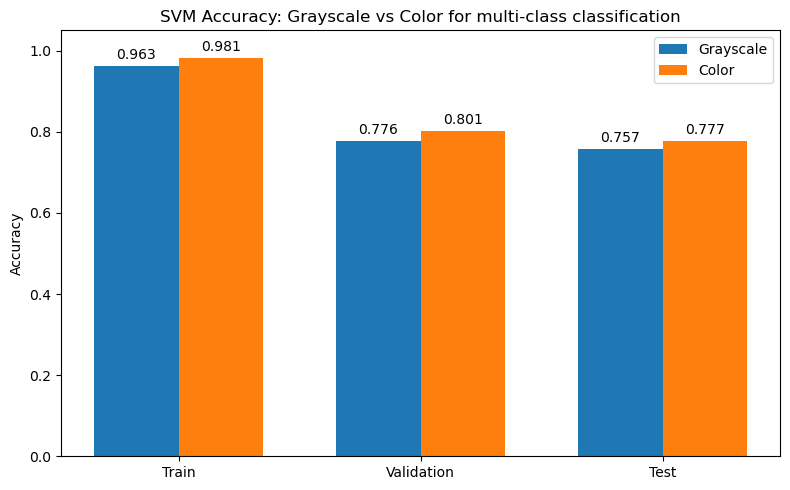

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracies for Grayscale and Color
train_acc  = [0.9628, 0.9808]         # [Grayscale, Color]
val_acc    = [0.7762, 0.8013]
test_acc   = [0.7575, 0.7775]

# Combine into a single array for easier plotting
accuracies = np.array([train_acc, val_acc, test_acc])  # shape: (3 metrics, 2 experiments)
metrics = ['Train', 'Validation', 'Test']
experiments = ['Grayscale', 'Color']

x = np.arange(len(metrics))  # [0,1,2]
width = 0.35  # width of bars

fig, ax = plt.subplots(figsize=(8,5))

# Plot bars side by side for each metric
rects1 = ax.bar(x - width/2, accuracies[:,0], width, label='Grayscale', color='#1f77b4')
rects2 = ax.bar(x + width/2, accuracies[:,1], width, label='Color', color='#ff7f0e')

# Labels and title
ax.set_ylabel('Accuracy')
ax.set_ylim([0,1.05])
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_title('SVM Accuracy: Grayscale vs Color for multi-class classification')
ax.legend()

# Show value labels on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()


# Results or Metrics for the binary classes for gray and coloured images 
Plot 1 : Showing the imbalance in the dataset
Plot 2 : Showing the number of samples for binary classes 
Plot 3 : Distribution of no of features at each stage coloured images -> resized coloured images -> pca gray images-> resized gray images -> pca 
plot 4 : Training results for gray and coloured images for binary classification 

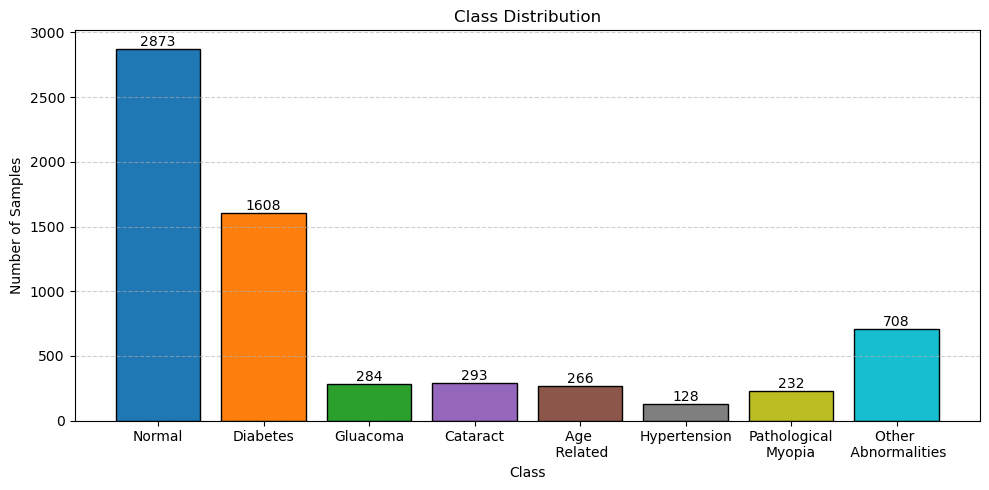

In [77]:
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('full_df.csv')
df['target'] = df['target'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

num_classes = len(df['target'].iloc[0])
class_counts = [0] * num_classes

for target in df['target']:
    for i in range(num_classes):
        if target[i] == 1:
            class_counts[i] += 1
class_names = ['Normal', 'Diabetes', 'Gluacoma', 'Cataract', 'Age \n Related', 'Hypertension', 'Pathological\nMyopia', 'Other \n Abnormalities'] # replace if needed
counts = class_counts
x = np.arange(len(class_names))
colors = plt.cm.tab10(np.linspace(0, 1, num_classes))

plt.figure(figsize=(10, 5))
bars = plt.bar(x, counts, color=colors, edgecolor='black')

plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.xticks(x, class_names)  
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}",
        ha='center',
        va='bottom',
        fontsize=10
    )
plt.tight_layout()
plt.show()


In [ ]:
import ast

clean_targets = []  
for value in df['target']:
    if isinstance(value, str):
        value = ast.literal_eval(value)   
    clean_targets.append(value)
df['target'] = clean_targets     

new_targets = []
for value in df['target']:   
    first_element = value[0]  
    if first_element == 1:
        new_targets.append('1')
    else:
        new_targets.append('0')

df['target'] = new_targets



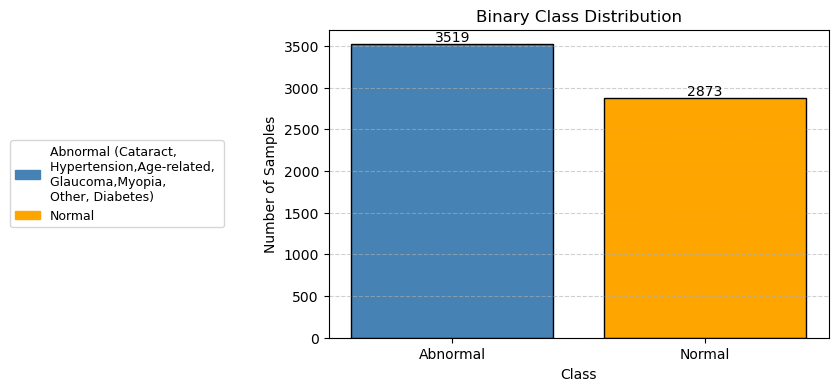

In [101]:
import matplotlib.pyplot as plt

counts = df['target'].value_counts().sort_index()
class_names = ['Abnormal', 'Normal']
values = counts.values

fig, ax = plt.subplots(figsize=(10, 4))

# Bars
bars = ax.bar(
    class_names,
    values,
    color=['steelblue', 'orange'],
    edgecolor='black'
)

ax.set_xlabel("Class")
ax.set_ylabel("Number of Samples")
ax.set_title("Binary Class Distribution")
ax.grid(axis='y', linestyle='--', alpha=0.6)

legend_handles = [
    plt.Rectangle((0, 0), 1, 1, color='steelblue'),
    plt.Rectangle((0, 0), 1, 1, color='orange')
]

legend_labels = [
    'Abnormal (Cataract, \nHypertension,Age-related, \nGlaucoma,Myopia, \nOther, Diabetes)',
    'Normal'
]

ax.legend(
    legend_handles,
    legend_labels,
    loc='center left',
    bbox_to_anchor=(-0.65, 0.5),
    fontsize=9,
    frameon=True
)
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height}",
        ha='center',
        va='bottom',
        fontsize=10
    )
plt.subplots_adjust(left=0.4)

plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_27540\180074572.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_27540\180074572.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


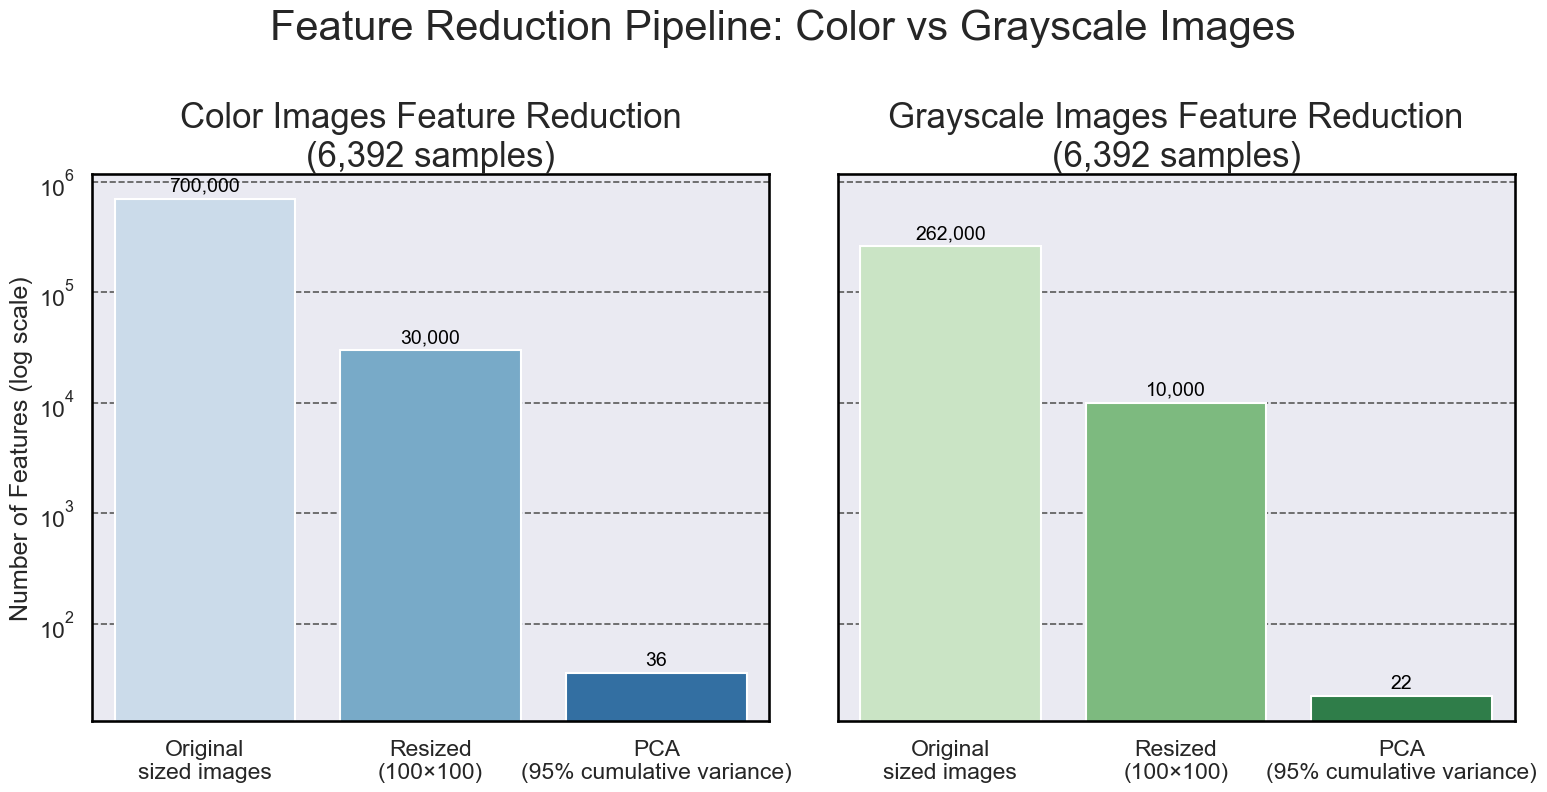

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = {
    "Image Type": ["Color"] * 3 + ["Grayscale"] * 3,
    "Stage": [
        "Original\nsized images", "Resized\n(100×100)", "PCA\n(95% cumulative variance)",
        "Original\nsized images", "Resized\n(100×100)", "PCA\n(95% cumulative variance)"
    ],
    "Features": [
        700000, 30000, 36,
        262000, 10000, 22
    ]
}

df_plot = pd.DataFrame(data)
sns.set_theme(
    style="darkgrid",
    context="talk",
    palette="deep",
    rc={
        "grid.color": "0.35",      # darker gray (0 = black, 1 = white)
        "grid.linewidth": 1.2,     # thicker grid lines
        "grid.linestyle": "--",    # dashed grid
        "axes.edgecolor": "black"
    }
)
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
sns.barplot(
    data=df_plot[df_plot["Image Type"] == "Color"],
    x="Stage",
    y="Features",
    palette="Blues",
    ax=axes[0]
)
axes[0].set_title("Color Images Feature Reduction\n(6,392 samples)", fontsize=25)
axes[0].set_xlabel("")
axes[0].set_ylabel("Number of Features (log scale)")
axes[0].set_yscale("log")
sns.barplot(
    data=df_plot[df_plot["Image Type"] == "Grayscale"],
    x="Stage",
    y="Features",
    palette="Greens",
    ax=axes[1]
)
axes[1].set_title("Grayscale Images Feature Reduction\n(6,392 samples)", fontsize=25)
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_yscale("log")
for ax in axes:
    for container in ax.containers:
        ax.bar_label(
            container,
            labels=[f"{round(v):,}" for v in container.datavalues],
            padding=3,
            fontsize=14,
            color= "Black"
        )
fig.suptitle(
    "Feature Reduction Pipeline: Color vs Grayscale Images",
    fontsize=30,
    y=1.0
)
plt.tight_layout()
plt.show()


Plotting the training resuls for SVM on gray-scale images and coloured images for binary classification task

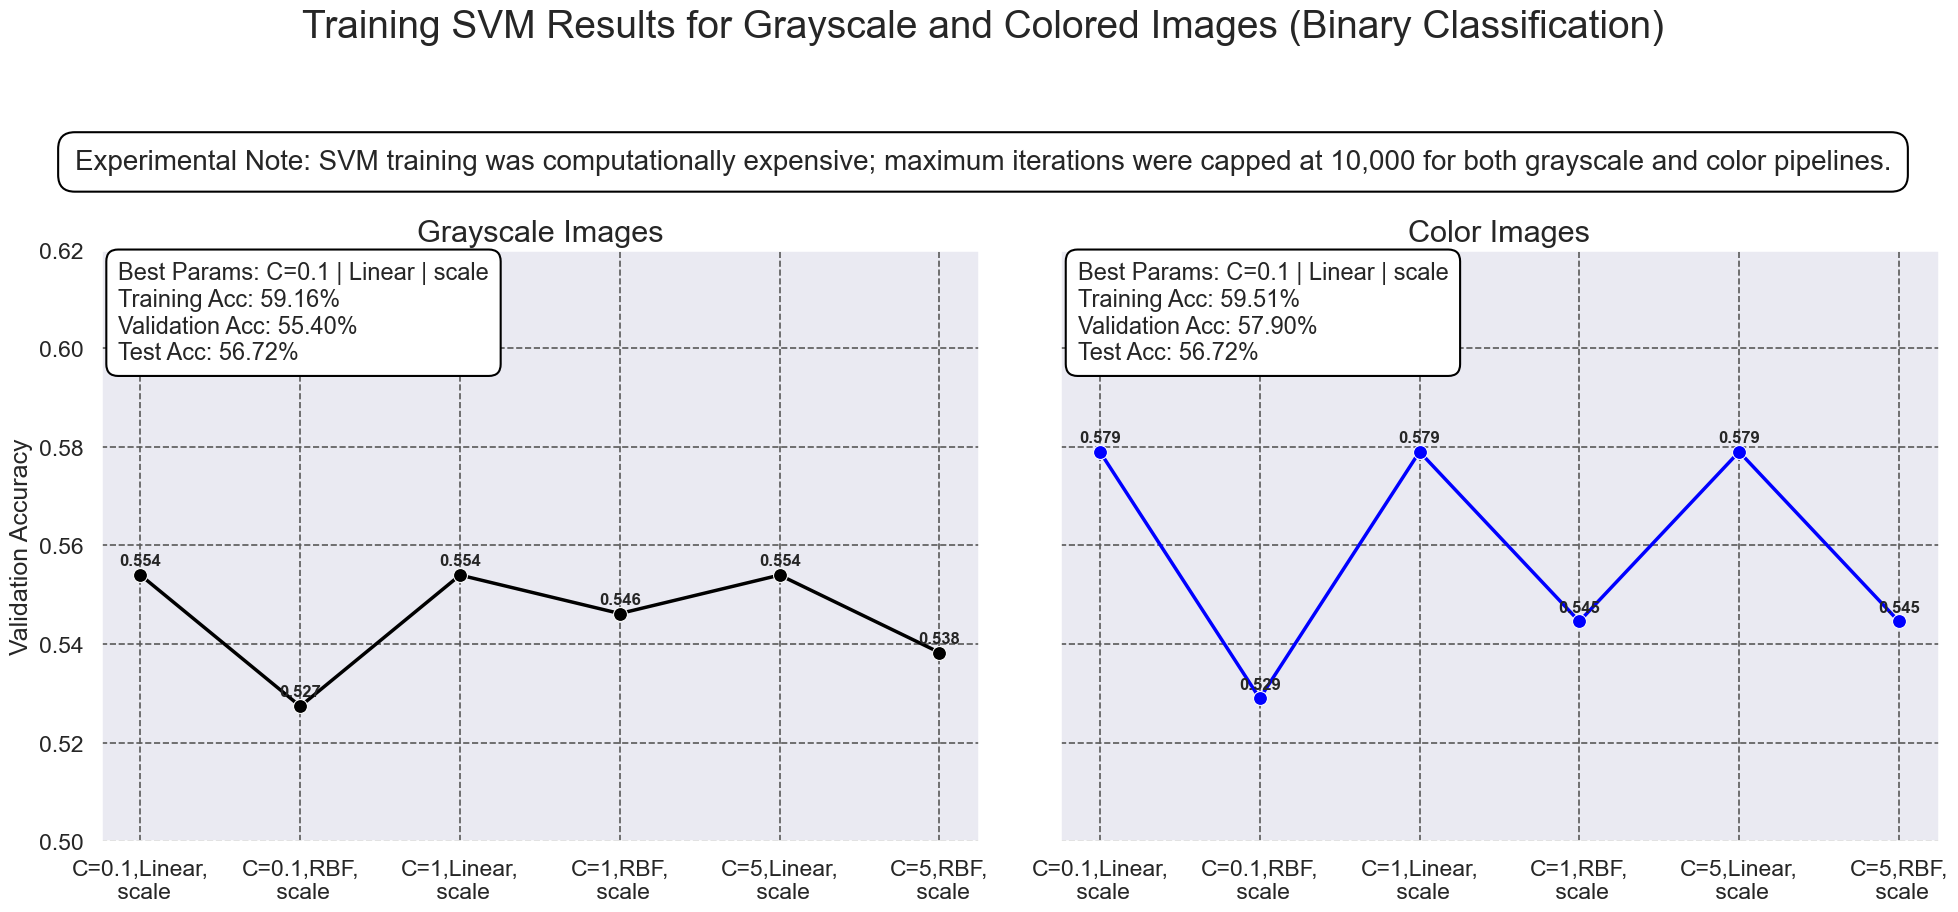

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "Image Type": ["Grayscale"] * 6 + ["Color"] * 6,
    "Configuration": [
        "C=0.1,Linear,\n scale", "C=0.1,RBF,\n scale",
        "C=1,Linear,\n scale",   "C=1,RBF,\n scale",
        "C=5,Linear,\n scale",   "C=5,RBF,\n scale",
        "C=0.1,Linear,\n scale", "C=0.1,RBF,\n scale",
        "C=1,Linear,\n scale",   "C=1,RBF,\n scale",
        "C=5,Linear,\n scale",   "C=5,RBF,\n scale"
    ],
    "Validation Accuracy": [
        0.5540, 0.5274, 0.5540, 0.5462, 0.5540, 0.5383,   # Grayscale
        0.5790, 0.5290, 0.5790, 0.5446, 0.5790, 0.5446    # Color
    ]
}

df_results = pd.DataFrame(data)

sns.set_theme(
    style="darkgrid",
    context="talk",
    rc={
        "grid.color": "0.35",
        "grid.linewidth": 1.2,
        "grid.linestyle": "--"
    }
)

fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
sns.lineplot(
    data=df_results[df_results["Image Type"] == "Grayscale"],
    x="Configuration",
    y="Validation Accuracy",
    marker="o",
    color="black",
    linewidth=2.5,
    markersize=10,
    ax=axes[0]
)

axes[0].set_title("Grayscale Images", fontsize=22)
axes[0].set_xlabel("")
axes[0].set_ylabel("Validation Accuracy")
axes[0].set_ylim(0.50, 0.62)

for x, y in zip(
    df_results[df_results["Image Type"] == "Grayscale"]["Configuration"],
    df_results[df_results["Image Type"] == "Grayscale"]["Validation Accuracy"]
):
    axes[0].text(x, y + 0.002, f"{y:.3f}", ha='center', fontsize=12, fontweight="bold")

sns.lineplot(
    data=df_results[df_results["Image Type"] == "Color"],
    x="Configuration",
    y="Validation Accuracy",
    marker="o",
    color="blue",
    linewidth=2.5,
    markersize=10,
    ax=axes[1]
)

axes[1].set_title("Color Images", fontsize=22)
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_ylim(0.50, 0.62)

for x, y in zip(
    df_results[df_results["Image Type"] == "Color"]["Configuration"],
    df_results[df_results["Image Type"] == "Color"]["Validation Accuracy"]
):
    axes[1].text(x, y + 0.002, f"{y:.3f}", ha='center', fontsize=12, fontweight="bold")

gray_text = (
    "Best Params: C=0.1 | Linear | scale\n"
    "Training Acc: 59.16%\n"
    "Validation Acc: 55.40%\n"
    "Test Acc: 56.72%"
)

color_text = (
    "Best Params: C=0.1 | Linear | scale\n"
    "Training Acc: 59.51%\n"
    "Validation Acc: 57.90%\n"
    "Test Acc: 56.72%"
)

axes[0].text(
    0.02, 0.98, gray_text,
    transform=axes[0].transAxes,
    fontsize=17,
    verticalalignment="top",
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black")
)

axes[1].text(
    0.02, 0.98, color_text,
    transform=axes[1].transAxes,
    fontsize=17,
    verticalalignment="top",
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black")
)
fig.suptitle(
    "Training SVM Results for Grayscale and Colored Images (Binary Classification)",
    fontsize=28,
    y=1.15
)

info_text = (
    "Experimental Note: SVM training was computationally expensive; "
    "maximum iterations were capped at 10,000 for both grayscale and color pipelines."
)

fig.text(
    0.5, 0.95,
    info_text,
    ha="center",
    fontsize=20,
    bbox=dict(
        boxstyle="round,pad=0.6",
        facecolor="white",
        edgecolor="black"
    )
)

plt.tight_layout()
plt.show()


Plotting all the results for the multi-class classification : We took this route as in the case of binary classification may be the abnormal class had a lot of variety in the dataset whereas in the normal features might not be that competent to beat abnormal features hence to add more diversity in the dataset we tried implementing multi-class classification over binary class classification.

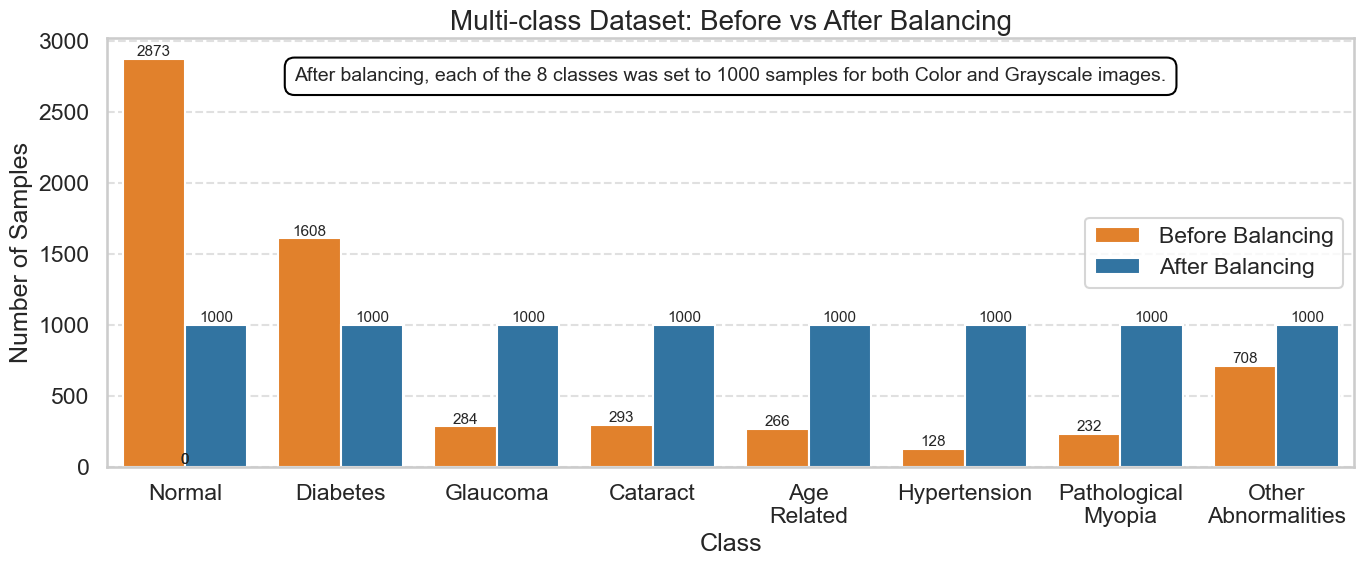

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

classes = ["Normal", "Diabetes", "Glaucoma", "Cataract", "Age\nRelated",
           "Hypertension", "Pathological\nMyopia", "Other\nAbnormalities"]

before_counts = [2873, 1608, 284, 293, 266, 128, 232, 708]

after_counts = [1000] * 8

df_balance = pd.DataFrame({
    "Class": classes * 2,
    "Count": before_counts + after_counts,
    "Stage": ["Before Balancing"] * 8 + ["After Balancing"] * 8
})

sns.set_theme(style="whitegrid", context="talk")
plt.figure(figsize=(14,6))
sns.barplot(
    data=df_balance,
    x="Class",
    y="Count",
    hue="Stage",
    palette=["#ff7f0e", "#1f77b4"]
)

plt.title("Multi-class Dataset: Before vs After Balancing", fontsize=20)
plt.ylabel("Number of Samples")
plt.xlabel("Class")
plt.xticks(rotation=0)
plt.legend(title="")
plt.grid(axis='y', linestyle='--', alpha=0.6)

for p in plt.gca().patches:
    height = p.get_height()
    plt.text(
        p.get_x() + p.get_width()/2,
        height + 20,
        f"{int(height)}",
        ha='center',
        fontsize=11
    )
plt.text(
    0.5, 0.9,
    "After balancing, each of the 8 classes was set to 1000 samples for both Color and Grayscale images.",
    ha="center",
    fontsize=14,
    transform=plt.gca().transAxes,
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black")
)

plt.tight_layout()
plt.show()


Training results for multi-class classificatio resutlts for grsyscale images as well as colored images

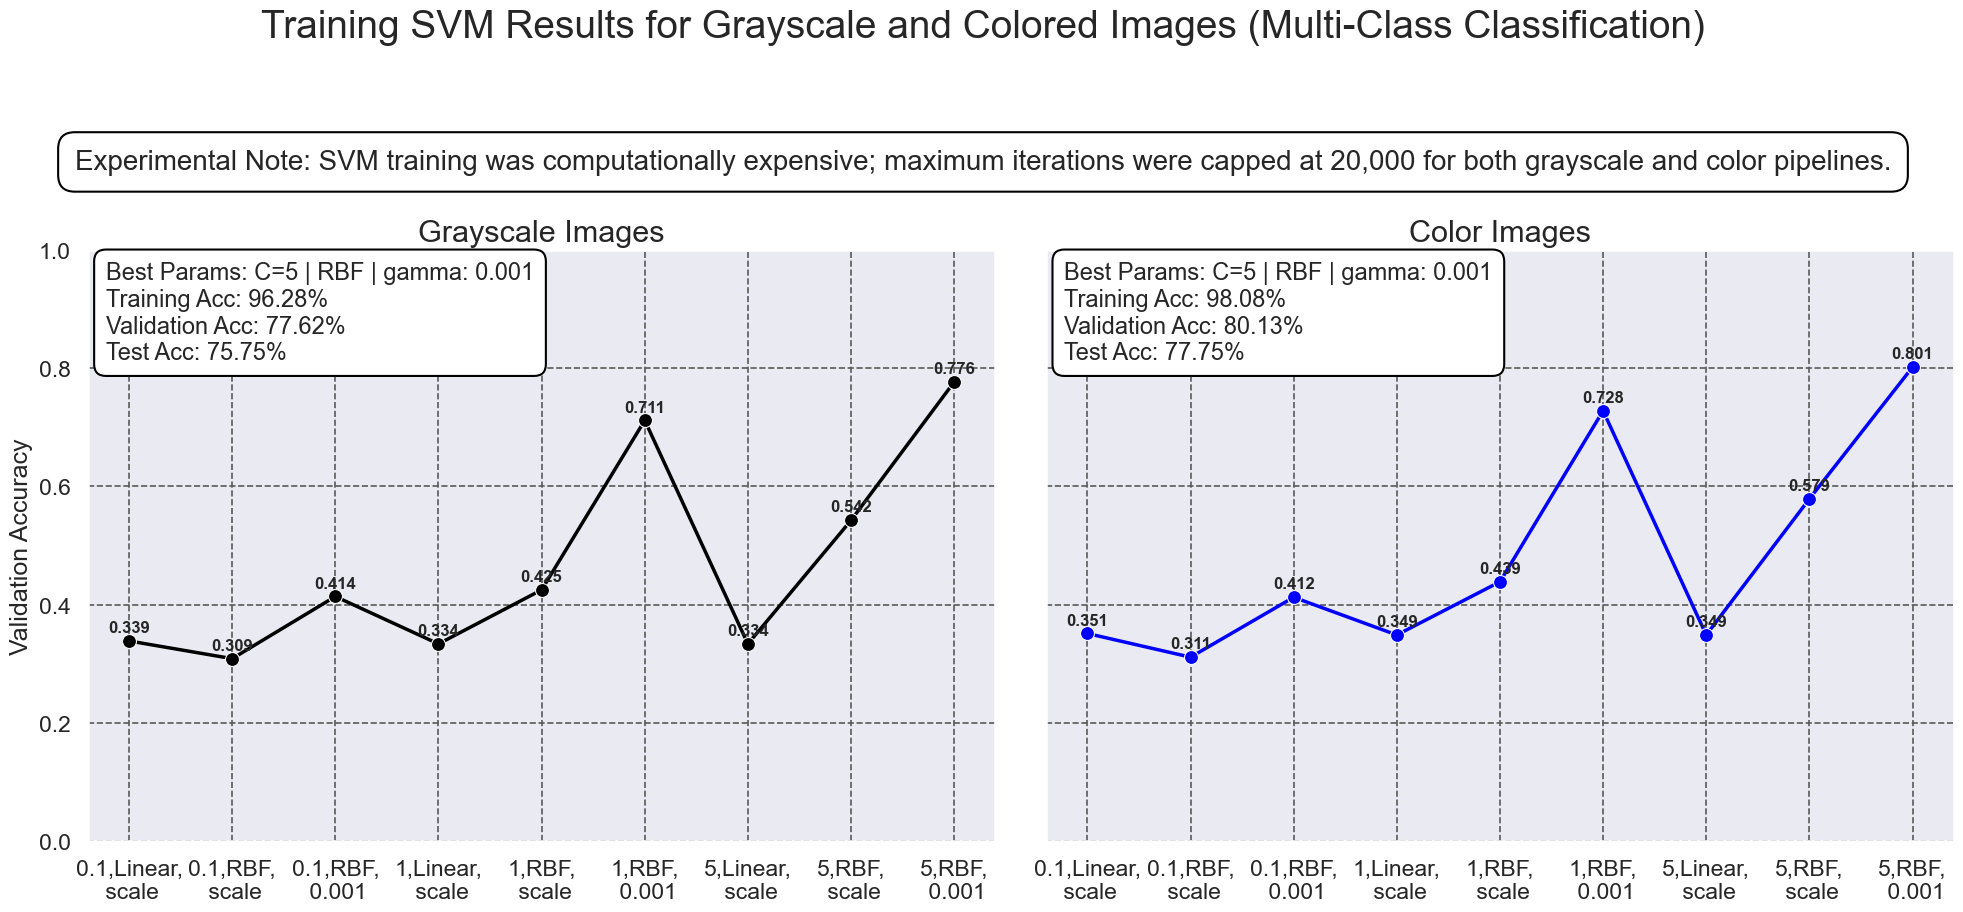

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = {
    "Image Type": ["Grayscale"] * 9 + ["Color"] * 9,
    "Configuration": [
        "0.1,Linear,\n scale", "0.1,RBF,\n scale", "0.1,RBF,\n 0.001",
        "1,Linear,\n scale", "1,RBF,\n scale", "1,RBF,\n 0.001",
        "5,Linear,\n scale", "5,RBF,\n scale", "5,RBF,\n 0.001",
        "0.1,Linear,\n scale", "0.1,RBF,\n scale", "0.1,RBF,\n 0.001",
        "1,Linear,\n scale", "1,RBF,\n scale", "1,RBF,\n 0.001",
        "5,Linear,\n scale", "5,RBF,\n scale", "5,RBF,\n 0.001"
    ],
    "Validation Accuracy": [
        0.3387, 0.3088, 0.4138, 0.3337, 0.4250, 0.7113, 0.3337, 0.5425, 0.77625,  # Grayscale
        0.3513, 0.3113, 0.4125, 0.3488, 0.4387, 0.7275, 0.3488, 0.5787, 0.80125   # Color
    ]
}

df = pd.DataFrame(data)
sns.set_theme(
    style="darkgrid",
    context="talk",
    rc={"grid.color": "0.35", "grid.linewidth": 1.2, "grid.linestyle": "--"}
)

fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

def plot_svm(ax, image_type, line_color):
    df_sub = df[df["Image Type"] == image_type]
    sns.lineplot(
        data=df_sub,
        x="Configuration",
        y="Validation Accuracy",
        marker="o",
        color=line_color,
        linewidth=2.5,
        markersize=10,
        ax=ax
    )
    ax.set_title(f"{image_type} Images", fontsize=22)
    ax.set_xlabel("")
    ax.set_ylabel("Validation Accuracy")
    ax.set_ylim(0, 1) 

    for x, y in zip(df_sub["Configuration"], df_sub["Validation Accuracy"]):
        ax.text(x, y + 0.015, f"{y:.3f}", ha='center', fontsize=12, fontweight="bold")

plot_svm(axes[0], "Grayscale", line_color="black")
plot_svm(axes[1], "Color", line_color="blue")
axes[1].set_ylabel("") 

gray_text = (
    "Best Params: C=5 | RBF | gamma: 0.001\n"
    "Training Acc: 96.28%\n"
    "Validation Acc: 77.62%\n"
    "Test Acc: 75.75%"
)

color_text = (
    "Best Params: C=5 | RBF | gamma: 0.001\n"
    "Training Acc: 98.08%\n"
    "Validation Acc: 80.13%\n"
    "Test Acc: 77.75%"
)

axes[0].text(
    0.02, 0.98, gray_text,
    transform=axes[0].transAxes,
    fontsize=17,
    verticalalignment="top",
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black")
)

axes[1].text(
    0.02, 0.98, color_text,
    transform=axes[1].transAxes,
    fontsize=17,
    verticalalignment="top",
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black")
)
fig.suptitle(
    "Training SVM Results for Grayscale and Colored Images (Multi-Class Classification)",
    fontsize=28,
    y=1.15
)
info_text = (
    "Experimental Note: SVM training was computationally expensive; "
    "maximum iterations were capped at 20,000 for both grayscale and color pipelines."
)

fig.text(
    0.5, 0.95,
    info_text,
    ha="center",
    fontsize=20,
    bbox=dict(boxstyle="round,pad=0.6", facecolor="white", edgecolor="black")
)

plt.tight_layout()
plt.show()


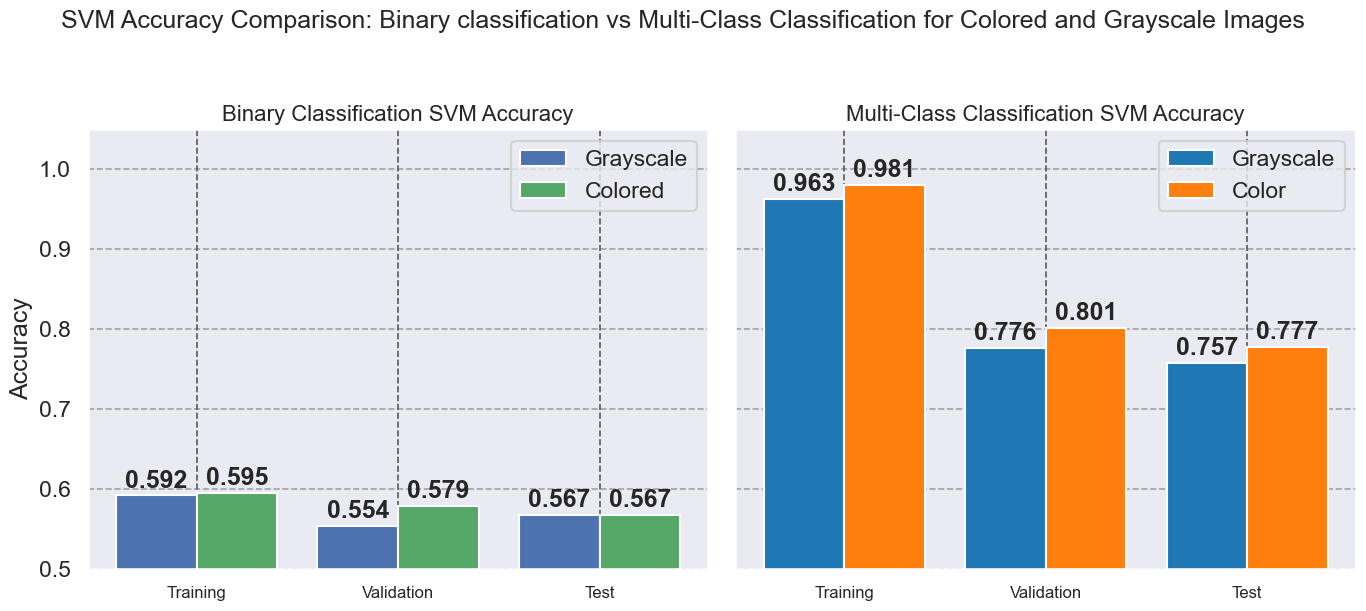

In [174]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ["Training", "Validation", "Test"]

grayscale_bin = [0.5916, 0.5540, 0.5672]
coloured_bin  = [0.5951, 0.5790, 0.5672]

grayscale_multi = [0.9628, 0.7762, 0.7575]
color_multi     = [0.9808, 0.8013, 0.7775]

width = 0.40
x = np.arange(len(metrics))

fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)
plt.subplots_adjust(wspace=0.3)

axes[0].bar(x - width/2, grayscale_bin, width, label='Grayscale', color="#4C72B0")
axes[0].bar(x + width/2, coloured_bin, width, label='Colored', color="#55A868")

for i, v in enumerate(grayscale_bin):
    axes[0].text(i - width/2, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')
for i, v in enumerate(coloured_bin):
    axes[0].text(i + width/2, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')

axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics, fontsize=12)
axes[0].set_ylim(0.50, 1.05)
axes[0].set_title("Binary Classification SVM Accuracy", fontsize=16)
axes[0].set_ylabel("Accuracy")
axes[0].grid(axis='y', linestyle='--', alpha=0.5)
axes[0].legend()

axes[1].bar(x - width/2, grayscale_multi, width, label='Grayscale', color="#1f77b4")
axes[1].bar(x + width/2, color_multi, width, label='Color', color="#ff7f0e")

for i, v in enumerate(grayscale_multi):
    axes[1].text(i - width/2, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')
for i, v in enumerate(color_multi):
    axes[1].text(i + width/2, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')

axes[1].set_xticks(x)
axes[1].set_xticklabels(metrics, fontsize=12)
axes[1].set_ylim(0.50, 1.05)
axes[1].set_title("Multi-Class Classification SVM Accuracy", fontsize=16)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)
axes[1].legend()

fig.suptitle("SVM Accuracy Comparison: Binary classification vs Multi-Class Classification for Colored and Grayscale Images", fontsize=18, y=1.03)

plt.tight_layout()
plt.show()
